# Assignment 7

This assignment follows the same structure as Assignment 6. We will employ at least a 2x2 completely crossed experimental design. We will again use a simple training-and-test regimen. The factors in the design may include numbers of layers and/or nodes within layers, types of layers (convolutional or pooling), and/or other hyperparameters. You will utilize convolutional neural networks (CNNs) within Python TensorFlow. 

This week, you will compete in the Dogs vs. Cats kernels Edition Kaggle.com competition, https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition (Links to an external site.). .  (Links to an external site.)Specifically, you will build models using the training set to forecast the test set. The images are in .jpg format, so you will need to research how to handle that.  You are required to submit no fewer than four models for evaluation by Kaggle.com, and you must provide your Kaggle.com scores and user ID for validation. 


# Management Problem
Assume that we are providing advice to a website provider who is looking for tools to automatically label images provided by end users. As we look across the factors in the study, making recommendations to management about image classification, we are most concerned about achieving the highest possible accuracy in image classification. That is, we should be willing to sacrifice training time for model accuracy. What type of machine learning model works best? If it is a convolutional neural network, what type of network should we use? Part of this recommendation may concern information about the initial images themselves (input data for the classification task). What types of images work best?



In [61]:
import os
import numpy as np
import pandas as pd
from scipy import stats
from datetime import datetime

#diplay and plotting
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.image import imread

import tensorflow as tf
from tensorflow import keras
import kerastuner as kt
#from keras.preprocessing.image import load_img
#from keras.preprocessing.image import img_to_array

import pydot
import graphviz
import getpass
import smtplib

from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

RANDOM_SEED = 42


In [38]:
Dogphotos = np.load('dogs_1000_64_64_3.npy')
scaled_DP = Dogphotos/255.
grayscaleDogs = np.load('dogs_1000_64_64_1.npy')
Catphotos = np.load('cats_1000_64_64_3.npy')
grayscaleCats = np.load('cats_1000_64_64_1.npy')
scaled_grayCats = grayscaleCats/255.
scaled_grayDogs =  grayscaleDogs/255.
scaled_CP = Catphotos/255.

catlabels= np.repeat(0,1000)
doglabels = np.repeat(1,1000)


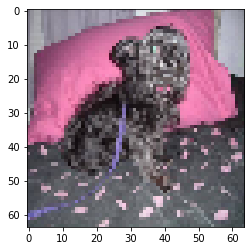

In [20]:
plt.imshow(scaled_DP[0, :, :, :])

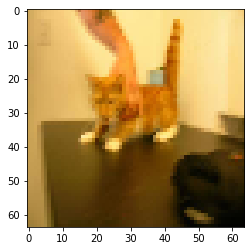

In [23]:
plt.imshow(scaled_CP[0, :, :, :])

In [63]:
photos = np.append(scaled_CP, scaled_DP, axis=0)
labels = np.append(catlabels, doglabels, axis=0)
grayphotos= np.append(scaled_grayCats, scaled_grayDogs, axis =0)

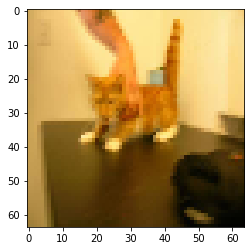

In [34]:
plt.imshow(photos[0, :, :, :])

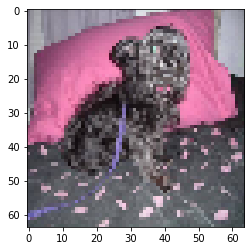

In [33]:
plt.imshow(photos[1000, :, :, :])

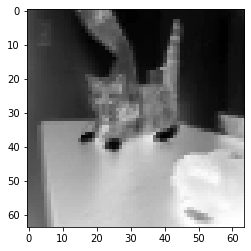

In [64]:
plt.imshow(grayphotos[0], cmap='gist_yarg')

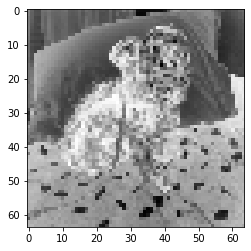

In [65]:
plt.imshow(grayphotos[1000], cmap='gist_yarg')

In [57]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(2, activation='softmax'))


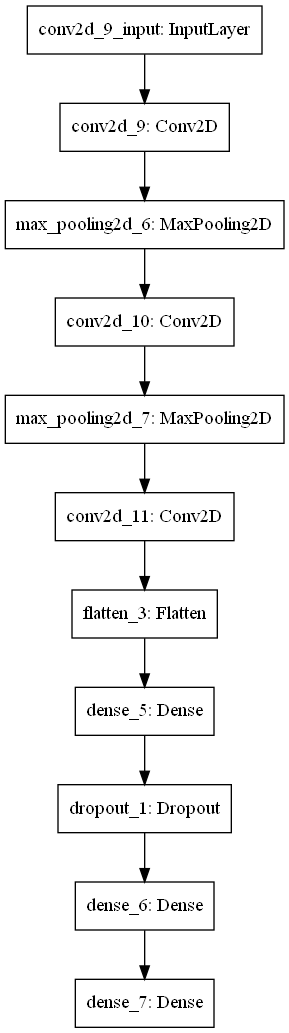

In [58]:
keras.utils.plot_model(model)

In [59]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [66]:
X,  y = shuffle(photos, labels, random_state=RANDOM_SEED)

grayX, y = shuffle(grayphotos, labels, random_state=RANDOM_SEED)

In [68]:
trainX, valX, trainy, valy = train_test_split( X, y, test_size=0.33, random_state=RANDOM_SEED)
gray_trainX, gray_valX, gray_trainy, gray_valy  = train_test_split( grayX, y, test_size=0.33, random_state=RANDOM_SEED)

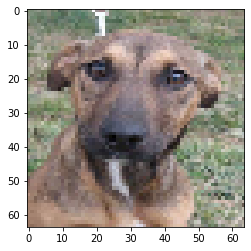

In [69]:
plt.imshow(trainX[1000])

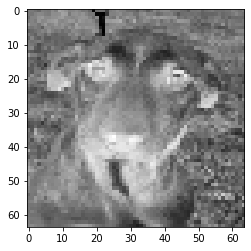

In [70]:
plt.imshow(gray_trainX[1000], cmap='gist_yarg')

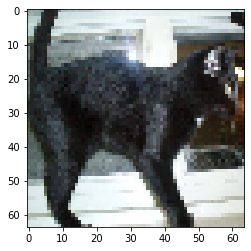

In [71]:
plt.imshow(valX[100])

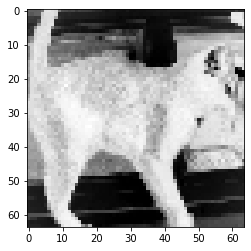

In [72]:
plt.imshow(gray_valX[100], cmap='gist_yarg')